In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import urllib.request

import gzip
import shutil

import scipy
from scipy.stats import pearsonr
from sklearn import linear_model


import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('df_master.csv')

In [3]:
df.columns

Index(['id', 'host_id', 'calendar_last_scraped', 'neighbourhood', 'latitude',
       'longitude', 'price', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'reviews_per_month', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cl

In [4]:
property_type_new = []

for i in df.property_type:
    if 'rental unit' in i:
        property_type_new.append('rental_unit')
    elif 'home' in i:
        property_type_new.append('home')
    elif 'apartment' in i:
        property_type_new.append('apartment')
    elif 'townhouse' in i:
        property_type_new.append('townhouse')
    elif 'guesthouse' in i:
        property_type_new.append('guesthouse')
    elif 'guest suite' in i:
        property_type_new.append('guest_suite')
    elif 'condo' in i:
        property_type_new.append('condo')
    elif ('hotel' or 'aparthotel' or 'hosel') in i:
        property_type_new.append('hotel')
    elif 'cottage' in i:
        property_type_new.append('gcottage')
    elif 'villa' in i:
        property_type_new.append('villa')
    else:
         property_type_new.append('others')

In [5]:
df['property_type_new'] = property_type_new

----

In [20]:
from matplotlib import pyplot as plt

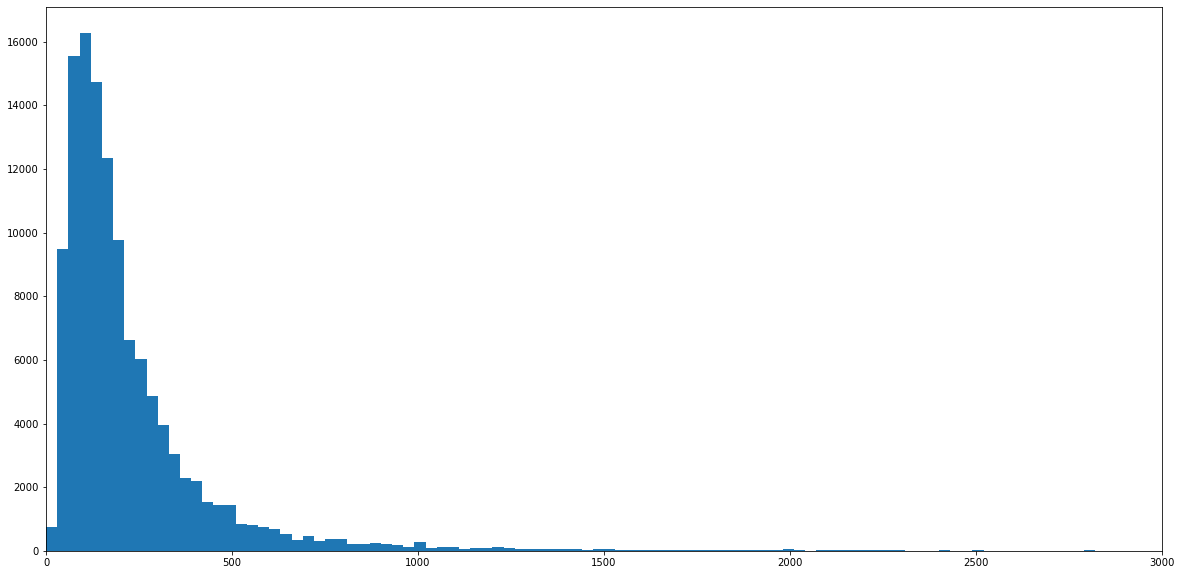

In [21]:
plt.figure(figsize = [20,10])
plt.hist(df.price, bins = 1000)
plt.xlim([0,3000])
plt.show()

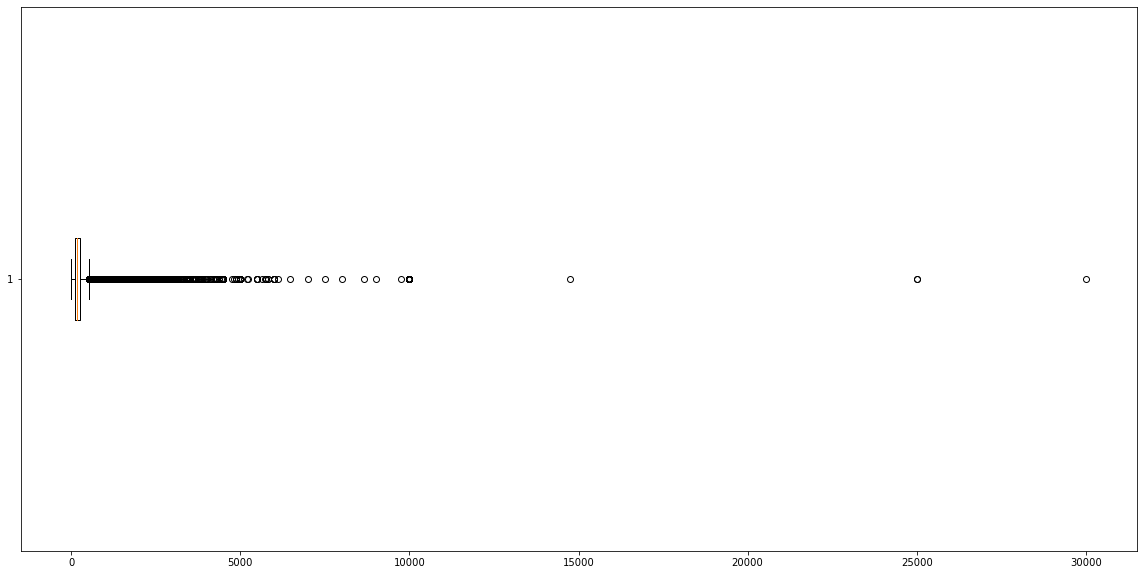

In [22]:
plt.figure(figsize = [20,10])
plt.boxplot(df.price, vert=False)
plt.show()

In [6]:
# take log to address the skewness
take_log = lambda i: np.log10(i+1)
df['log_price'] = df.price.apply(take_log)

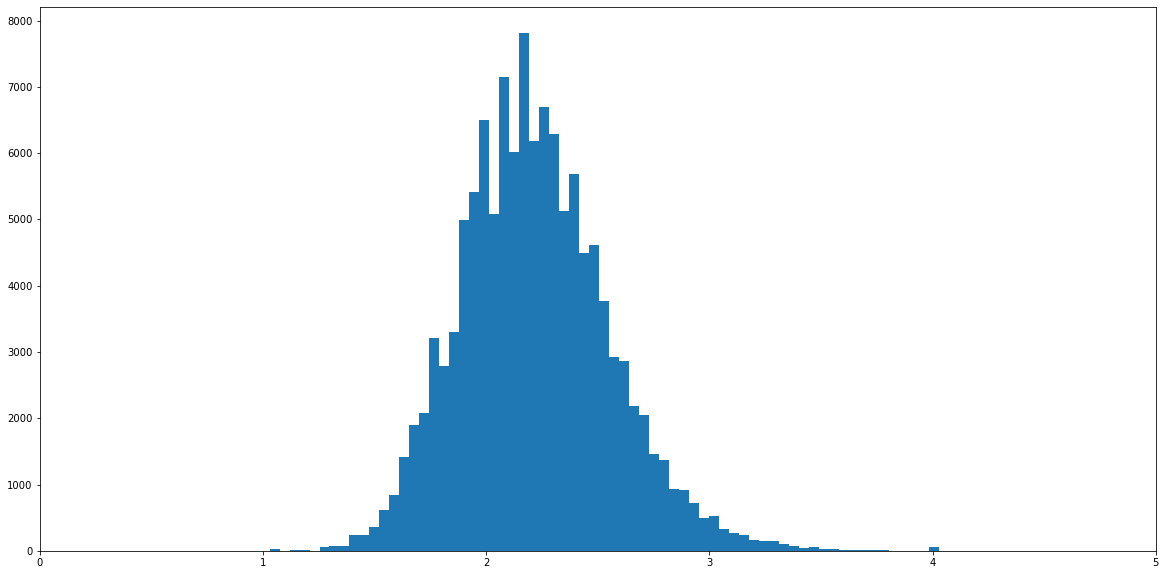

In [137]:
plt.figure(figsize = [20,10])
plt.hist(df.log_price, bins = 100)
plt.xlim([0,5])
plt.show()

In [7]:
df.price.describe()

count    121267.000000
mean        235.294738
std         376.148514
min           0.000000
25%          98.000000
50%         157.000000
75%         265.000000
max       30000.000000
Name: price, dtype: float64

In [8]:
np.percentile(df.price, 99.9)

4128.370000000621

In [25]:
np.percentile(df.price, 0.1)

19.0

In [10]:
from scipy import stats
stats.percentileofscore(df.price, 5000)

99.9253712881493

In [11]:
df.price.sort_values(ascending = False)

43379     30000.0
107581    25000.0
1762      24999.0
109127    14738.0
119755    10000.0
           ...   
38529        10.0
90158        10.0
35714        10.0
13045         2.0
107985        0.0
Name: price, Length: 121267, dtype: float64

In [12]:
df.to_csv('df_master_paper.csv')

### https://www.methods.manchester.ac.uk/themes/survey-and-statistical-methods/fixed-effects-versus-multilevel-models/

------

In [81]:
m1 = smf.ols('price ~ Gini + medianincome + population + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable) + C(city)', df[(df.price <= 1877) & (df.has_availability == 't')]).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2193.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:18:28   Log-Likelihood:            -7.6990e+05
No. Observations:              120548   AIC:                         1.540e+06
Df Residuals:                  120491   BIC:                         1.540e+06
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [82]:
m1_2 = smf.rlm('price ~ Gini + medianincome + population + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable) + C(city)', df[(df.price <= 1877) & (df.has_availability == 't')]).fit()
print(m1_2.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:               120548
Model:                            RLM   Df Residuals:                   120491
Method:                          IRLS   Df Model:                           56
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 21 Sep 2022                                         
Time:                        15:18:43                                         
No. Iterations:                    27                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [83]:
m2 = smf.ols('log_price ~ Gini + medianincome + population + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable) + C(city)', df[(df.price <= 1877) & (df.has_availability == 't')]).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     4035.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:18:45   Log-Likelihood:                 28673.
No. Observations:              120548   AIC:                        -5.723e+04
Df Residuals:                  120491   BIC:                        -5.668e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [84]:
m3 = smf.ols('price ~ Gini + medianincome + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable) + C(state)', df[(df.price <= 1877) & (df.has_availability == 't')]).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     2490.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:18:49   Log-Likelihood:            -7.7072e+05
No. Observations:              120548   AIC:                         1.542e+06
Df Residuals:                  120499   BIC:                         1.542e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [85]:
m4 = smf.ols('log_price ~ Gini + medianincome + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable) + C(state)', df[(df.price <= 1877) & (df.has_availability == 't')]).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     4516.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:18:56   Log-Likelihood:                 27055.
No. Observations:              120548   AIC:                        -5.401e+04
Df Residuals:                  120499   BIC:                        -5.354e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [71]:
m5 = smf.ols('price ~ Gini*C(host_identity_verified) + medianincome + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication +review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable) + C(city)', df[(df.price <= 1328) & (df.has_availability == 't')]).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2265.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:08:30   Log-Likelihood:            -7.4978e+05
No. Observations:              119942   AIC:                         1.500e+06
Df Residuals:                  119884   BIC:                         1.500e+06
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [86]:
m6 = smf.ols('log_price ~ Gini*C(host_identity_verified) + medianincome + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication +review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable) + C(city)', df[(df.price <= 1877) & (df.has_availability == 't')]).fit()
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3966.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:19:03   Log-Likelihood:                 28695.
No. Observations:              120548   AIC:                        -5.727e+04
Df Residuals:                  120490   BIC:                        -5.671e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [87]:
m7 = smf.mixedlm('price ~ Gini*C(host_identity_verified) + medianincome + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication +review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable)', df[(df.price <= 1877) & (df.has_availability == 't')], groups=df[(df.price <= 1877) & (df.has_availability == 't')]["city"]).fit()
print(m7.summary())

                            Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            price       
No. Observations:              120548             Method:                        REML        
No. Groups:                    24                 Scale:                         20657.4421  
Min. group size:               186                Log-Likelihood:                -769931.4266
Max. group size:               26042              Converged:                     Yes         
Mean group size:               5022.8                                                        
---------------------------------------------------------------------------------------------
                                             Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
---------------------------------------------------------------------------------------------
Intercept                                   -559.722  201.319  -2.780 0.005 -954.300 -16

In [88]:
m8 = smf.mixedlm('log_price ~ Gini*C(host_identity_verified) + medianincome + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication +review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable)', df[(df.price <= 1877) & (df.has_availability == 't')], groups=df[(df.price <= 1877) & (df.has_availability == 't')]["city"]).fit()
print(m8.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                         Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           log_price 
No. Observations:             120548            Method:                       REML      
No. Groups:                   24                Scale:                        0.0364    
Min. group size:              186               Log-Likelihood:               28405.1195
Max. group size:              26042             Converged:                    Yes       
Mean group size:              5022.8                                                    
----------------------------------------------------------------------------------------
                                            Coef.  Std.Err.    z     P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                    0.867    0.366    2.370 0.018  0.150  1.583
C(host_identity_verified)[T.t]              -0.

In [89]:
m9 = smf.mixedlm('log_price ~ Gini*C(host_identity_verified) + medianincome + bedrooms + beds + accommodates + C(room_type) + C(property_type_new) + minimum_nights + availability_30 + number_of_reviews + review_scores_rating + review_scores_location + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication +review_scores_value + host_exp_years + number_of_reviews + C(host_response_time) + C(host_is_superhost) + C(host_identity_verified) + C(instant_bookable)', df[(df.price <= 1877) & (df.has_availability == 't')], groups=df[(df.price <= 1877) & (df.has_availability == 't')]["state"]).fit()
print(m9.summary())

                         Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           log_price 
No. Observations:             120548            Method:                       REML      
No. Groups:                   14                Scale:                        0.0374    
Min. group size:              1614              Log-Likelihood:               26817.0545
Max. group size:              46605             Converged:                    Yes       
Mean group size:              8610.6                                                    
----------------------------------------------------------------------------------------
                                            Coef.  Std.Err.    z     P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                    2.413    0.057   42.133 0.000  2.300  2.525
C(host_identity_verified)[T.t]              -0.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
